# Exploring Relationships Task 6.2

## This script contains the following: 

### 1. Importing libraries and data

### 2. Picking out variables for exploratory visual analysis

### 3. Creating a correlation matrix heatmap 

### 4. Creating a scatterplot 

### 5. Creating a pair plot

### 6. Creating a categorical plot

### 7. Answering questions from exploratory analysis

### 8. Developing a hypothesis

## 1. Importing Libraries

In [11]:
## Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## 1. Importing Data

In [12]:
## Importing Data
df_terror = pd.read_csv(r"C:\Users\bgros\Documents\Career Foundry\10-2023 Global Terrorism Analysis\02. Data\Clean Data\Clean_Terror_Data.csv", encoding = "ISO-8859-1", low_memory=True)

In [3]:
## Consistency Checks
df_terror.head(3)

,iyear,imonth,iday,extended,country_txt,region_txt,latitude,longitude,crit1,crit2,...,propextent_txt,ishostkid,nhostkid,nhostkidus,hostkidoutcome_txt,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,2000,1,1,0,Namibia,Sub-Saharan Africa,-17.910812,19.988303,1,1,...,Missing,0.0,NaN,NaN,Missing,NaN,1,1,0,1
1,2000,1,1,1,Namibia,Sub-Saharan Africa,-17.910812,19.988303,1,1,...,Missing,1.0,20.0,0.0,Unknown,-99.0,1,1,0,1
2,2000,1,1,0,India,South Asia,32.925224,75.135264,1,1,...,Missing,0.0,NaN,NaN,Missing,NaN,1,1,0,1


## 2. Question 2: Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis. For instance, discard “ID,” “date,” and “index” variables.

### Answer 2: 
The variables I will use to answer my previous questions are: iyear, imonth, iday, country_txt, success, region_txt, attacktype1_txt, crit1, targtype1_txt, weaptype1_txt

## 3. Question 3 - Create a correlation matrix heatmap (colored). Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [13]:
## Checking Data Types 
df_terror.dtypes

iyear                   int64
imonth                  int64
iday                    int64
extended                int64
country_txt            object
region_txt             object
latitude              float64
longitude             float64
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
multiple              float64
success                 int64
suicide                 int64
attacktype1_txt        object
targtype1_txt          object
targsubtype1_txt       object
natlty1_txt            object
gname                  object
motive                 object
guncertain1           float64
individual              int64
nperps                float64
nperpcap              float64
claimed               float64
weaptype1_txt          object
weapsubtype1_txt       object
nkill                 float64
nkillus               float64
nkillter              float64
nwound                float64
nwoundus              float64
nwoundte  

In [14]:
## Changing Data Types 
df_terror['extended'] = df_terror['extended'].astype('category')
df_terror['crit1'] = df_terror['crit1'].astype('category')      
df_terror['crit2'] = df_terror['crit2'].astype('category')
df_terror['crit3'] = df_terror['crit3'].astype('category')
df_terror['doubtterr'] = df_terror['doubtterr'].astype('category')
df_terror['multiple'] = df_terror['multiple'].astype('category')
df_terror['success'] = df_terror['success'].astype('category')
df_terror['suicide'] = df_terror['suicide'].astype('category')
df_terror['guncertain1'] = df_terror['guncertain1'].astype('category')
df_terror['individual'] = df_terror['individual'].astype('category')
df_terror['claimed'] = df_terror['claimed'].astype('category')
df_terror['property'] = df_terror['property'].astype('category')
df_terror['ishostkid'] = df_terror['ishostkid'].astype('category')
df_terror['INT_LOG'] = df_terror['INT_LOG'].astype('category')
df_terror['INT_IDEO'] = df_terror['INT_IDEO'].astype('category')
df_terror['INT_MISC'] = df_terror['INT_MISC'].astype('category')
df_terror['INT_ANY'] = df_terror['INT_ANY'].astype('category')

In [8]:
## Consistency Checks
df_terror.dtypes

iyear                    int64
imonth                   int64
iday                     int64
extended              category
country_txt             object
region_txt              object
latitude               float64
longitude              float64
crit1                 category
crit2                 category
crit3                 category
doubtterr             category
multiple              category
success               category
suicide               category
attacktype1_txt         object
targtype1_txt           object
targsubtype1_txt        object
natlty1_txt             object
gname                   object
motive                  object
guncertain1           category
individual            category
nperps                 float64
nperpcap               float64
claimed               category
weaptype1_txt           object
weapsubtype1_txt        object
nkill                  float64
nkillus                float64
nkillter               float64
nwound                 float64
nwoundus

In [18]:
## Creating a subcateory for just numberic valus 
sub = df_terror[['imonth', 'iday', 'nperps', 'nperpcap', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 
                 'nwoundte', 'nhostkid', 'nhostkidus', 'nreleased']]

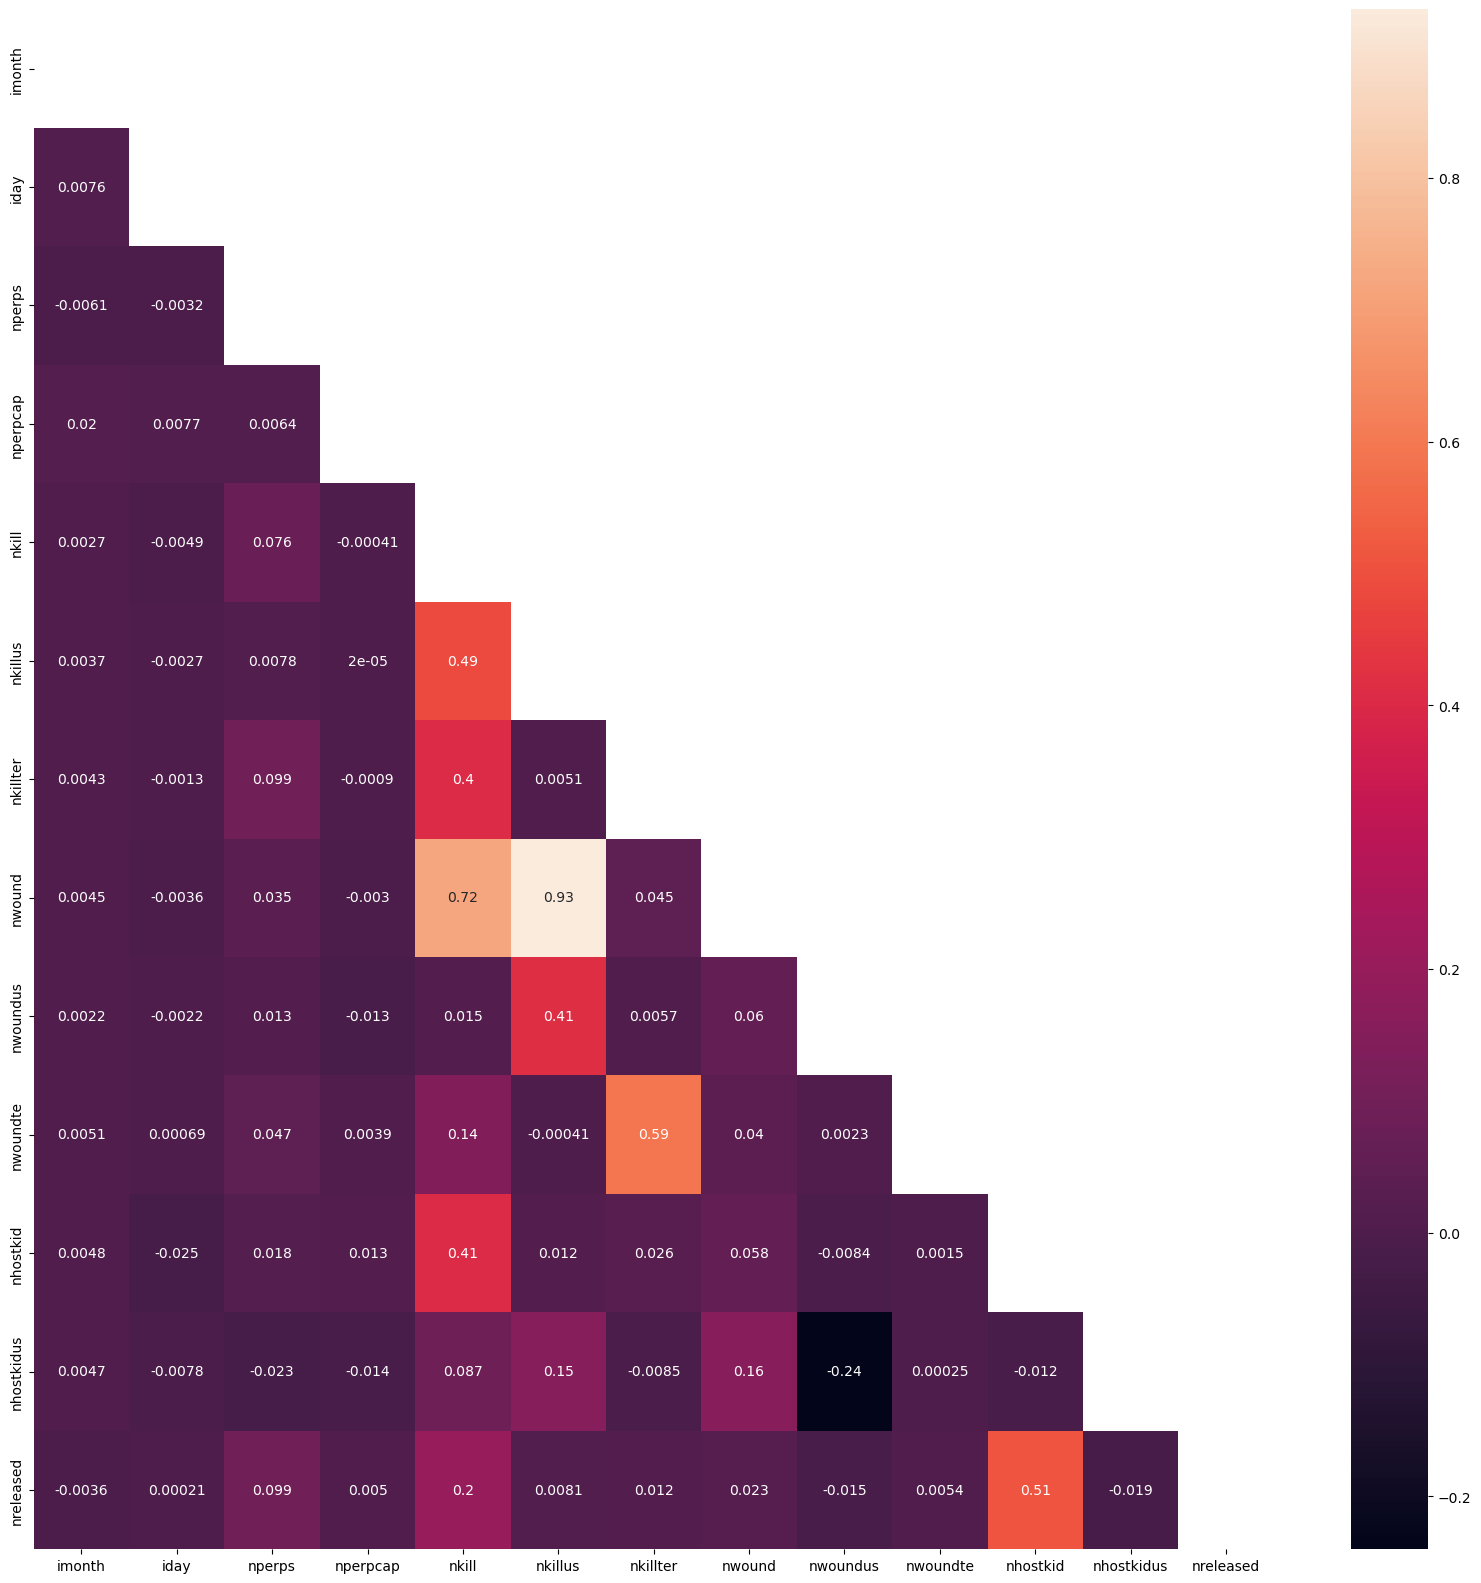

In [21]:
## Figure size configuration
f,ax = plt.subplots(figsize=(20,20))

## Only keeping the bottom half of the plot because the correlation matrix is symmetric
mask = np.triu(np.ones_like(sub.corr()))

## Calculating and plotting the correlation matrix
corr = sns.heatmap(sub.corr(), annot = True, ax = ax, mask=mask)

In [59]:
## From the plot above, the selected features are shown below. These features has considerable high correlation with one another
sub2 = df_terror[['nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 
                 'nwoundte', 'nhostkid', 'nhostkidus', 'nreleased']]
sub2.sample(10)

,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,nhostkid,nhostkidus,nreleased
48059,0.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN,NaN
66137,1.0,0.0,0.0,7.0,0.0,0.0,NaN,NaN,NaN
3204,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
88967,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
81897,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
69043,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
12655,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,200.0
26382,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
45861,0.0,0.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN
3484,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN


In [60]:
## Hostage columns have a lot of missing values indicated by -99 values. Checking percentage of missing values. 
sub2.isnull().sum()/len(sub2)

nkill         0.036483
nkillus       0.003203
nkillter      0.022890
nwound        0.069915
nwoundus      0.005077
nwoundte      0.038631
nhostkid      0.916200
nhostkidus    0.916700
nreleased     0.918414
dtype: float64

In [63]:
## Creating a subset of values that do not have missing values
sub2 = df_terror[['nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte']]

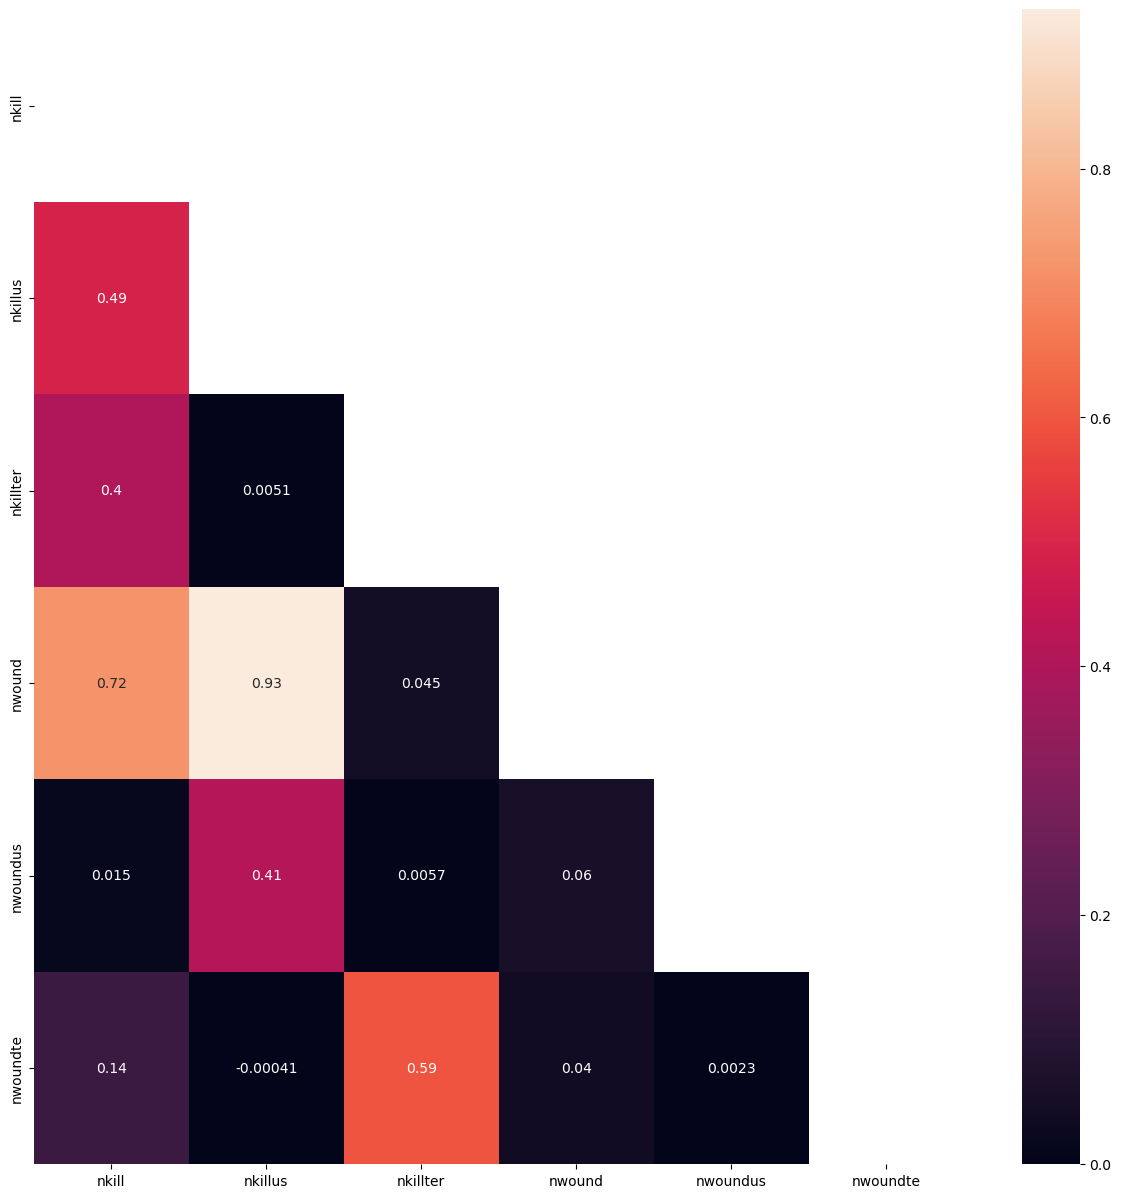

In [23]:
## Creating correlation matrix with subgroup 2

f,ax = plt.subplots(figsize=(15,15))

mask = np.triu(np.ones_like(sub2.corr()))

corr = sns.heatmap(sub2.corr(), annot = True, ax = ax, mask=mask)

### Answer 3: The closer the number is to -1 or 1 the stronger the correlation. In this instance I have 6 values that have correlations. 
1. As the number of people who are killed increase (nkill), so do the number of US people killed (nkillus). This is a moderate correlation (0.49).
2. As the number of people who are killed increase (nkill), so do the number of perpetrator fatalities (nkillter). This is a moderate correlation (0.4).
3. As the number of people who are killed increase (nkill), so do the number of people wounded (nwound). This is a strong correlation (0.72).
4. As the number of US people who are killed increase (nkillus), so do the number of people wounded (nwound). This is a strong correlation (0.93). 
5. As the number of US people who are killed increase (nkillus), so do the number of US people wounded (nwoundus). This is a moderate correlation (0.41).
6. As the number of perpetrator fatalities increase (nkillter) so do the number of perpetrators wounded (nwoundte). This is a strong correlation (0.59).

In [24]:
## Looking at just hostage columns
sub2 = df_terror[['nhostkid', 'nhostkidus', 'nreleased']]

## I replaced the value -99 with missing values (Nan)
sub2 = sub2.replace(to_replace=-99, value=np.nan)

sub2[sub2 == -99].sum()

nhostkid      0.0
nhostkidus    0.0
nreleased     0.0
dtype: float64

In [25]:
## Dropping all the rows with missing values
sub2 = sub2.dropna() 
sub2

,nhostkid,nhostkidus,nreleased
104,4.0,0.0,4.0
121,750.0,0.0,750.0
132,1.0,1.0,1.0
151,19.0,0.0,11.0
152,2.0,0.0,0.0
...,...,...,...
106075,6.0,0.0,4.0
106083,1.0,0.0,1.0
106091,3.0,0.0,3.0
106127,11.0,0.0,11.0


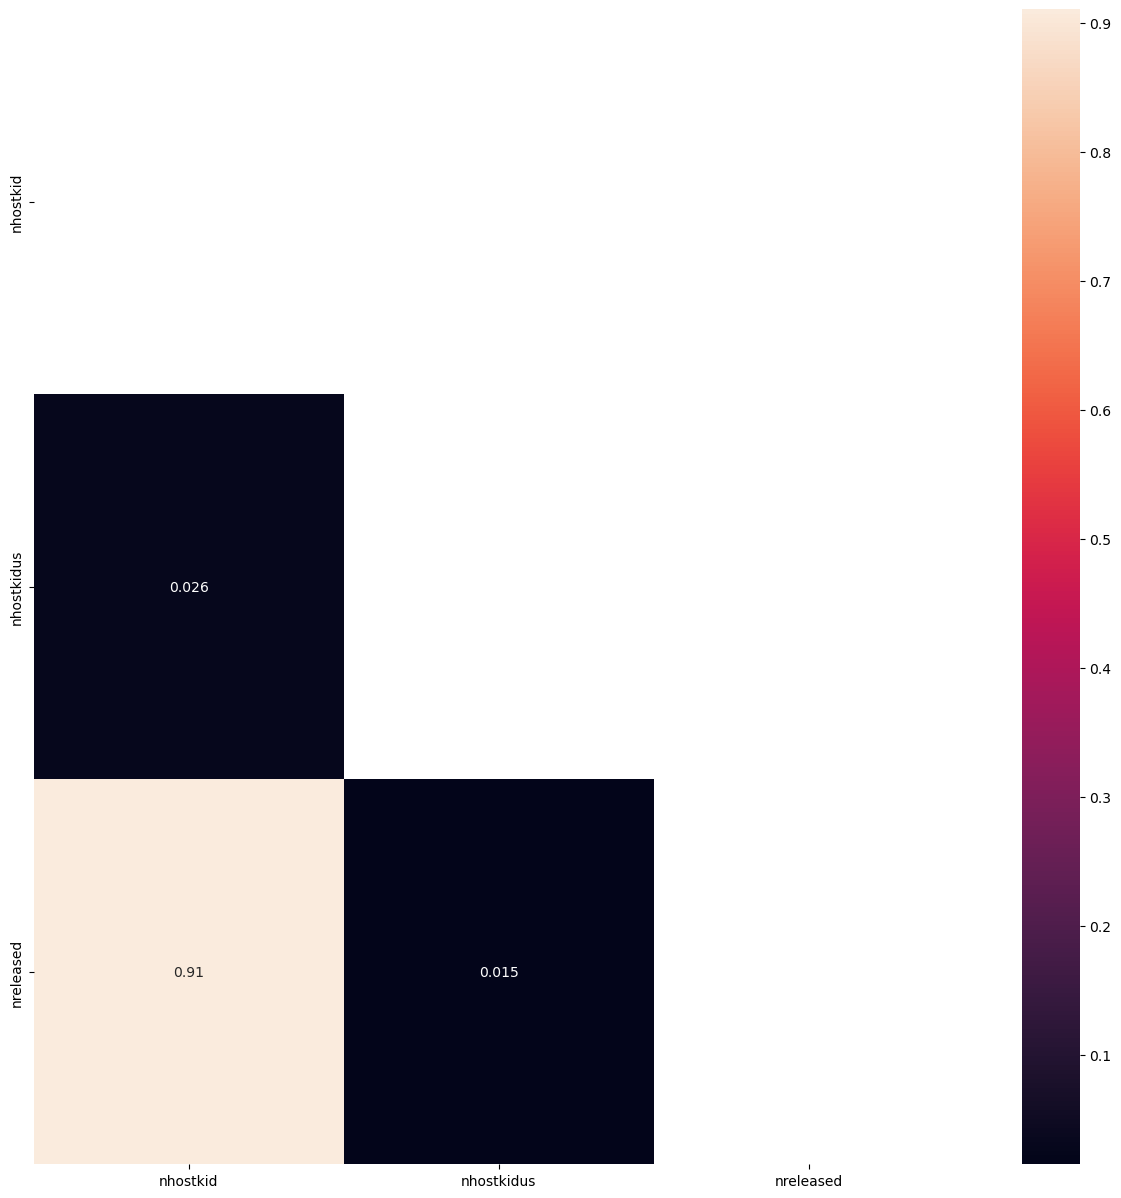

In [56]:
## Creating correlation matrix with just hostage variables 

f,ax = plt.subplots(figsize=(15,15))

mask = np.triu(np.ones_like(sub2.corr()))

corr = sns.heatmap(sub2.corr(), annot = True, ax = ax, mask=mask)

### Answer 3: 

The closer the number is to -1 or 1 the stronger the correlation. In this instance I have 1 value that has a correlation. 
1. As the total number of hostages (nhostkid) increase, so do the number of hostages released (nreleased). This is a strong correlation (0.91). 

## 4. Question 4 - Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell.

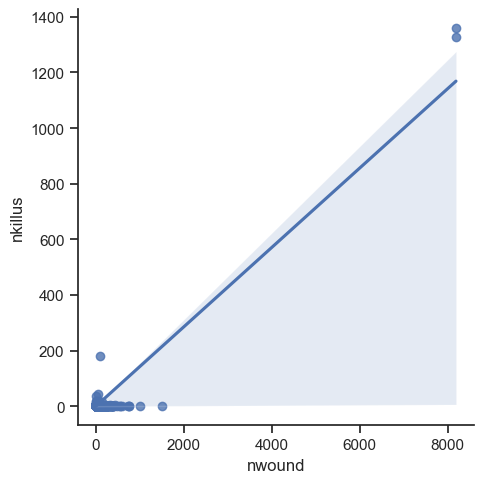

In [143]:
## Creating a scatterplot
sub2 = df_terror[['nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte']]

sns.lmplot(x = 'nwound', y = 'nkillus', data = sub2)

In [144]:
## Removing outliers 

sub2 = df_terror[['nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte']]

sub2 = sub2[(sub2['nwound'] < 8000) & (sub2['nkillus'] < 180)]

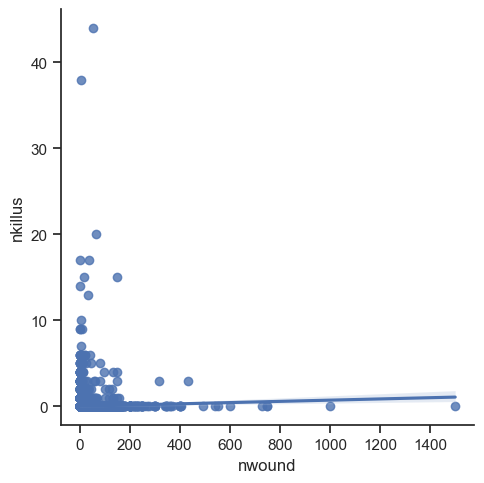

In [145]:
## Creating a scatterplot without outliers 
sns.lmplot(x = 'nwound', y = 'nkillus', data = sub2)

### Answer 4: 
This data has a linear trend. A lot of the data points are on are near the linear line. In the first plot, there are several outliers which are removed in the second plot. 

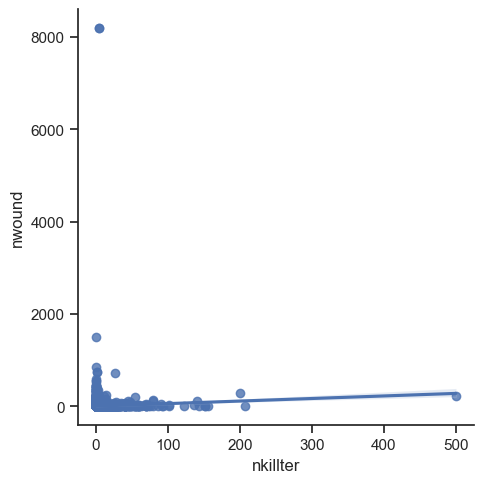

In [146]:
## Creating another scatterplot 

sub2 = df_terror[['nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte']]

## Creating a scatterplot
sns.lmplot(x = 'nkillter', y = 'nwound', data = sub2)

In [149]:
## Removing outliers 

sub2 = df_terror[['nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte']]

sub2 = sub2[(sub2['nwound'] < 8000) & (sub2['nkillter'] < 400) ]

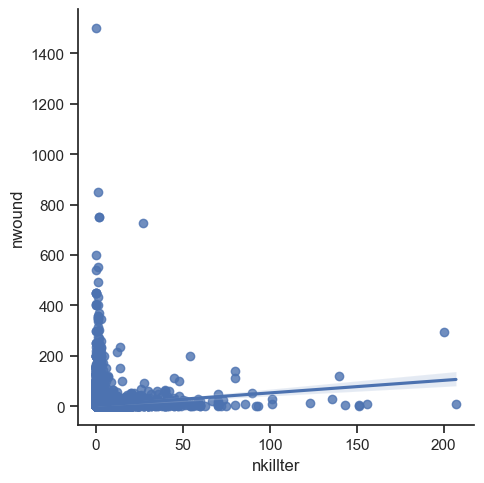

In [150]:
## Creating a scatterplot
sns.lmplot(x = 'nkillter', y = 'nwound', data = sub2)

### Answer 4: 
There is a moderate relationship between the number of perpetrators killed and the amount of people wounded.  A fair amount of values are near the trendline. In the first plot there are several outliers that are removed in the in second. 

## 5. Question 5: Create a pair plot of the entire data set. Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

In [31]:
## Creating a subgroup 
sub2 = df_terror[['nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte']]

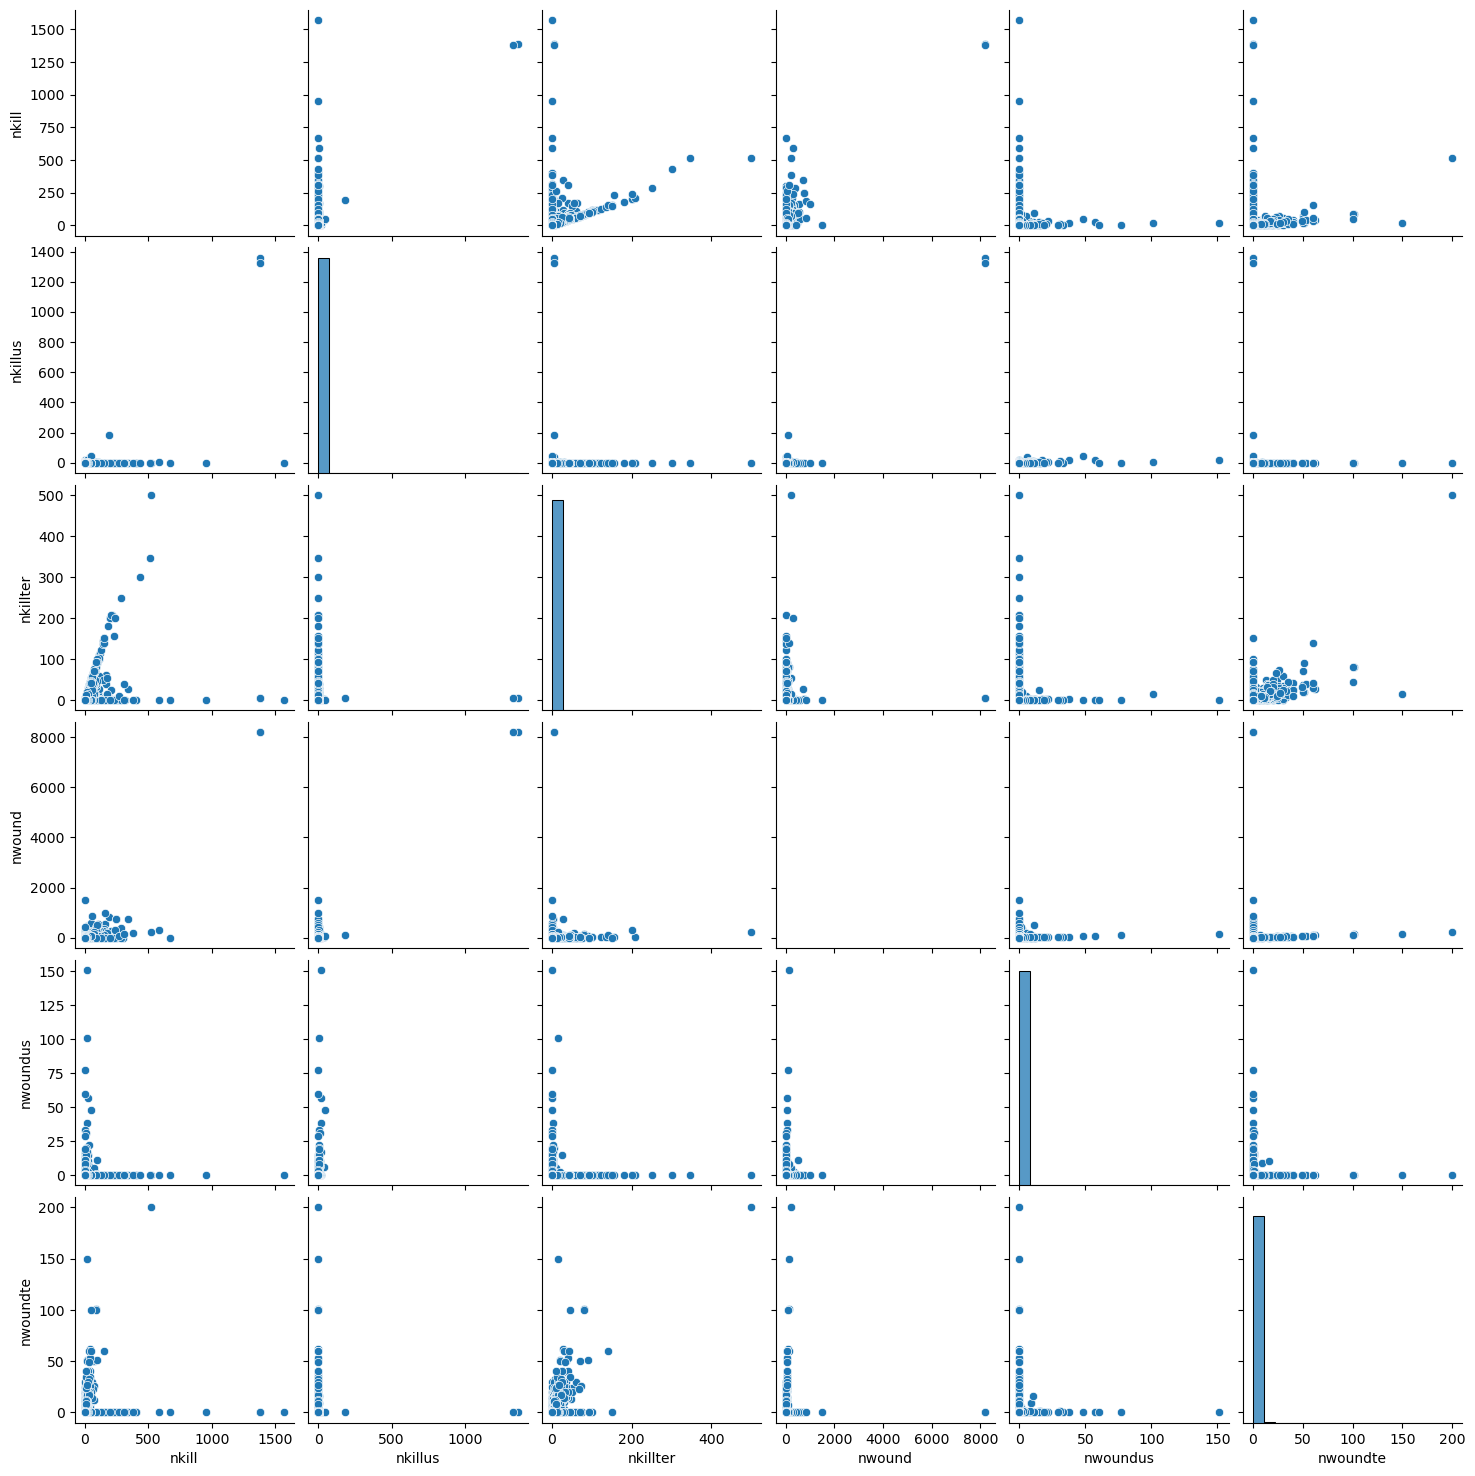

In [33]:
## Creating a pair plot 
g = sns.pairplot(sub2)

### Answer 5:
1. There appears to be a correlation as the number of perpetrators increase so does the number killed. (Row 1 from top, plot 3 from left) 
2. There may be a slight correlation as the number of perpetrators wounded increases so does the number killed. (Row 1, plot 6)
3. There are a lot of terrorist incidents that do not kill US citizens (row 2) 
4. There are may incidents where there was noone killed, but many US citizens were injuired (Row 4, plot 1) 


## 6. Question 6 - Create a categorical plot and interpret the results.

<Axes: xlabel='nkill', ylabel='Count'>

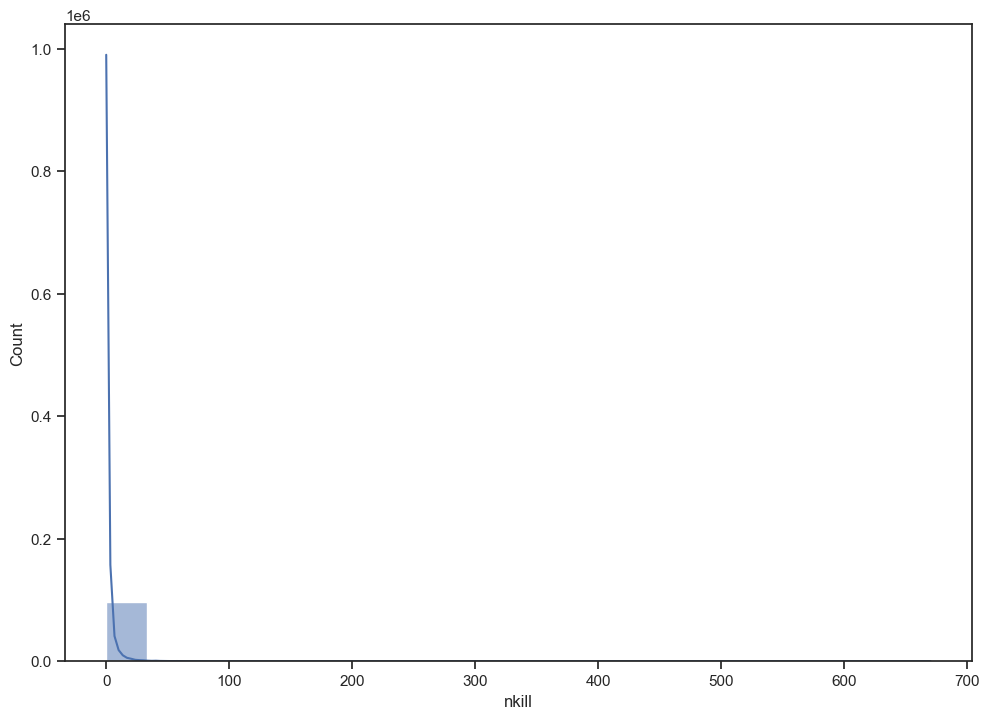

In [151]:
## Create a histogram
sns.histplot(sub2['nkill'], bins = 20, kde = True)

<Axes: xlabel='nkill', ylabel='Count'>

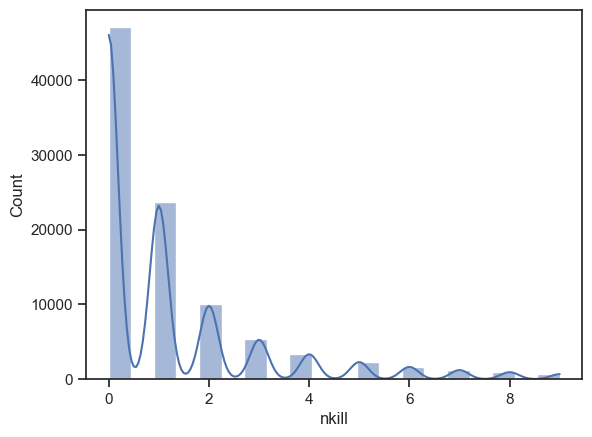

In [115]:
## Create a histogram with outliers removed 
sns.histplot(sub2['nkill'][sub2['nkill']<10], bins = 20, kde = True)

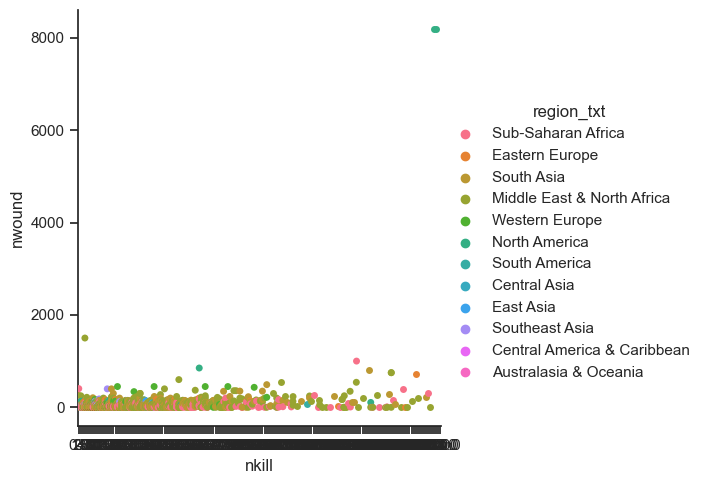

In [156]:
## Create a categorical plot in seaborn using the region categories 
sns.set(style="ticks")
g = sns.catplot(x="nkill", y="nwound", hue="region_txt", data=df_terror)

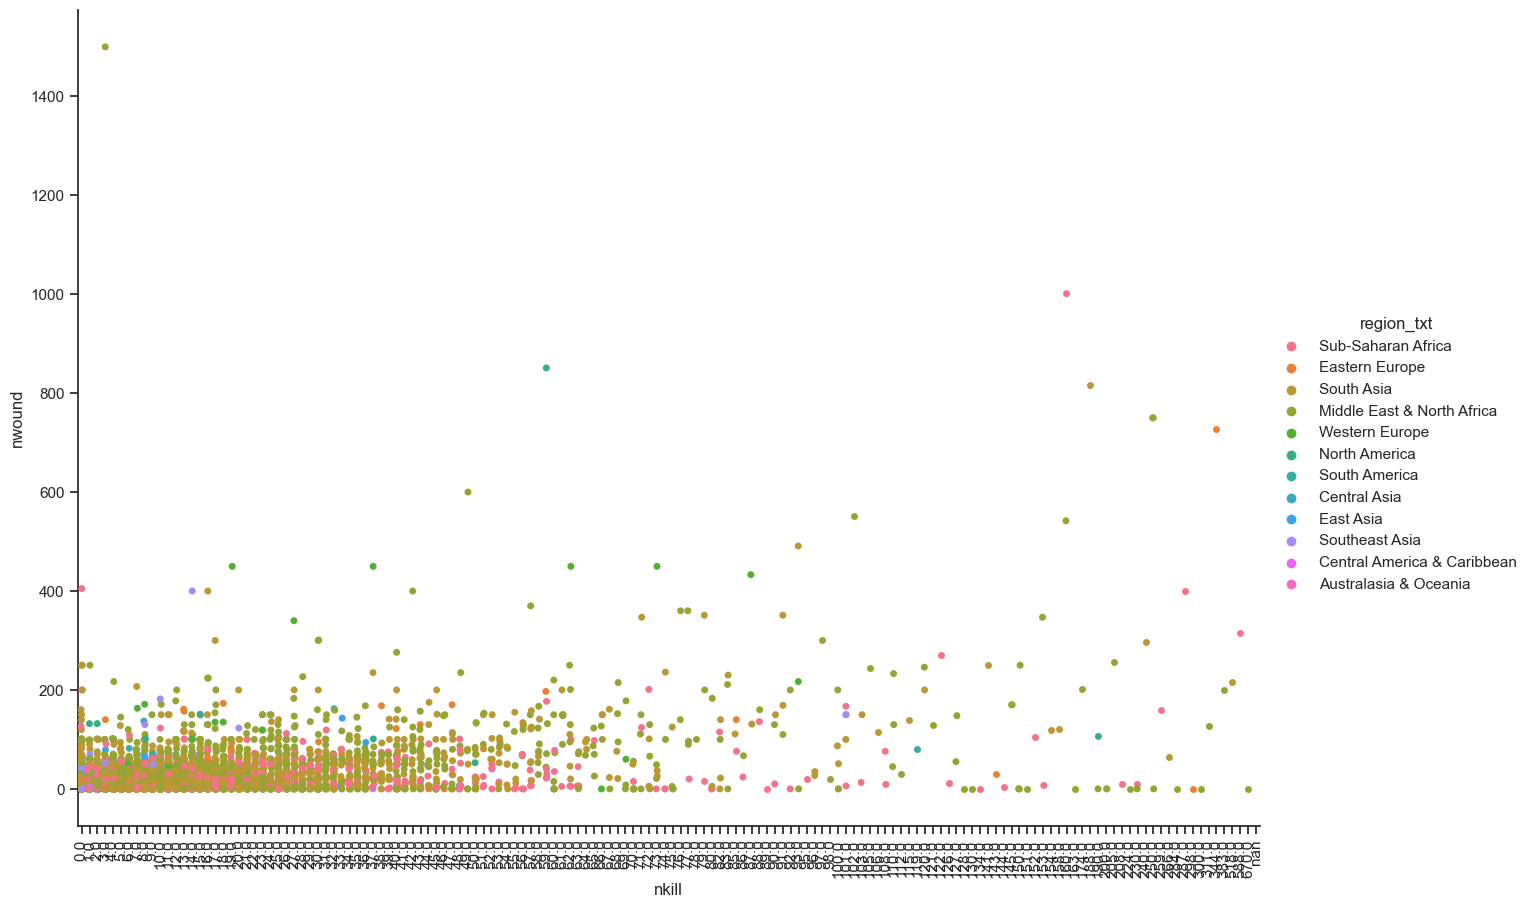

In [157]:
## Create a categorical plot in seaborn using the region categories removing outliers and making chart more reader friendly 
sub2 = df_terror[df_terror['nwound'] < 7000]


sns.set(style="ticks")
g = sns.catplot(x="nkill", y="nwound", hue="region_txt", data=sub2, height=9, aspect=13/9)
g.set_xticklabels(rotation=90)

### Answer: 
There are very few instances where the wounded rate gets higher as the death rate gets higher. From the colors, it appears most of the terrorist attacks happen in the middle east & north africa, south asia, and sub-saharan africa. 

## 7. Question 7 - Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

### Answer:
Most of my questions looked at trends over time, which I did not explore in this exploration. I can answer the top three regions with terrorism are: the middle east & north africa, south asia, and sub-saharan africa.

## 8. Question 8 - Define any hypotheses that you can at this point. You’ll be testing these later on.

### Answer: 
1. I hypothesize that the rates of terrorism in the middle east and north africa are higher because of a lower GDP. 
2. I hypothesize that the rates of terrorism in the middle east and north africa are higher because of a low amount of trust in goverment and corruption. (Happiness data)  
3. I hypothesize that if a large number of US people are killed from terrorism, then there is also a large amount of US citizens wounded. 